<a href="https://colab.research.google.com/github/Lasttrader/LT_finance_and_trading/blob/master/09_04_2023_fintech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fintech plan

In [ ]:
План:
1. Разработка коннектор Bybit с записью в БД

2. Разработка отрисовка графиков
-bb
-candles
-external candles

3. Отрисовка индикаторов
-high low
-bb
-external chart

4. Разработка алгоритма BB
5. +Получение high and low, фракталов
6. Разработка открытия закрытия стоп и Тейк
7. Тестирование алгоритма BB

SyntaxError: ignored

#Import

In [ ]:
!pip install pybit
!pip install qgrid

In [160]:

#bybit
import requests 
import json 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import qgrid
import time

#plotly
import plotly.graph_objects as go


In [ ]:
print('hello')

hello


SyntaxError: ignored

#Connectors

In [ ]:
Class connectors
Тип коннектора
-тинькоф
-сб РФ
-фридом
-райф
-bybit
-bingx
-БД postgresql
-БД mongodb
-БД clickhouse
-tradingview

Токен: 
Адрес:
БД
Логин
Пароль

SyntaxError: ignored

In [ ]:

import math
class circle():
    def __init__(self,radius):
        self.radius=radius
    def area(self):
        return math.pi*(self.radius**2)
    def perimeter(self):
        return 2*math.pi*self.radius
 
r=int(input("Enter radius of circle: "))
obj=circle(r)
print("Area of circle:",round(obj.area(),2))
print("Perimeter of circle:",round(obj.perimeter(),2))

#ETL

In [ ]:


Class ETL

Тип etl
-sql
-python

#Sources

In [ ]:
Class Источники

Получить коннектор

Def Получить котировку

Def Получить тиковые данные

Market_replay

#Visualization

In [ ]:
Class График
Нарисовать
Сохранить

In [ ]:
Class Индекаторы 
Горизонтальный объём
Индикатор внешнего таймфрейма
Болшинджер бэндс

#Indicators

#Patterns

#Trading and orders

#Money management

#Notifications

#Testing

#Machine learning

In [ ]:
Class анализ паттернов
Class tech indicators
Проверить при входе
Значение индикаторов в момент сделки
Class управление капиталом
Расчитать размер позиции
Class торговля
Ордер
Тейк
Стоп
Class уведомления
Class машинного обучения
Class screener

In [ ]:
Get_chart()
Объем повышение
Выставить ордер на минимум
Тейк 1 и 2 до объёма
Ордер на углы по объему V и А 4 часа
Получить график
Разбить на неделю
На день
На 4 часа
Определитт тренд и флэт по объему POC
проанализировать прошлую неделю на:
Углы по 4 часа
На фикспрефикс
На объём прошлой недели 
оценить объём по статистике
выставка ордера
Выставка стопа
Вы вставки Тейк на Макс
Выставка Тейк на х2
Скриншот
Пубшикации
Сопровождения
Скриншоты
Публикация
Статистика
Тренажёр
Подписка
Алгоритмы в торговле
Фикс префикс
 - Вход от фикса
тестирование  обьемного уровня
 - Вход на отскок
Тестирование Макс дельты внешней свечи
 - Вход от последнего уровня
 - Вход через 1 уровень
Зоны продавцов и покупателей
 - Треугольник выход вход на тесте
Торговля по тренду

In [ ]:
Get-graph 
Получаем график данные
 1. Получение графика и данных
 2. Проверка  времени понедельник 0000
 3.  получение данных недели ohlc
 4. Сравнение с предыдущей неделей
 5. Тип недели тренд, расширение, внутренняя
 6. Проверка BB получение уровней
 7. проверка H4 get dodgi и получение данных +/- 3 бара
 8. Проверка объёмов и дельты получение данных
 9. Проверка внутренней структуры недели где закрытие
 -если внутри то ФПФ
 -если снаружи то тест
 Входы
 Ohlc меньше ohlc - 1
  от ББ
  от уровня боли + зеркала (проверить виделали цена в прошлом)
  от доджи
 через 1 уровень  объема

#Workshop

In [206]:
#bybit
def get_bybit_bars(symbol, interval, startTime, endTime):
 
    url = "https://api.bybit.com/v2/public/kline/list"

    startTime = str(int(startTime.timestamp()))
    endTime   = str(int(endTime.timestamp()))
    req_params = {"symbol" : symbol, 'interval' : interval, 'from' : startTime, 'to' : endTime}
    df = pd.DataFrame(json.loads(requests.get(url, params = req_params).text)['result'])
    if (len(df.index) == 0):
        return None
    df.index = [dt.datetime.fromtimestamp(x) for x in df.open_time]
    return df
data = get_bybit_bars('ETHUSD', 240, dt.datetime(2023, 3, 10), dt.datetime(2023, 4, 10))
for i in data.columns:
  try:
    data[i]=data[i].astype('float')
  except:
    print(f'error {i}')
data.info()

error symbol
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2023-03-10 00:00:00 to 2023-04-09 16:00:00
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   symbol     185 non-null    object 
 1   interval   185 non-null    float64
 2   open_time  185 non-null    float64
 3   open       185 non-null    float64
 4   high       185 non-null    float64
 5   low        185 non-null    float64
 6   close      185 non-null    float64
 7   volume     185 non-null    float64
 8   turnover   185 non-null    float64
dtypes: float64(8), object(1)
memory usage: 14.5+ KB


In [207]:
data.head()

,symbol,interval,open_time,open,high,low,close,volume,turnover
2023-03-10 00:00:00,ETHUSD,240.0,1.678406e+09,1436.60,1436.60,1408.60,1425.40,41986513.0,29518.245585
2023-03-10 04:00:00,ETHUSD,240.0,1.678421e+09,1425.40,1425.60,1389.35,1410.75,64666761.0,45930.183768
2023-03-10 08:00:00,ETHUSD,240.0,1.678435e+09,1410.75,1411.85,1367.15,1384.20,69742314.0,50357.105897
2023-03-10 12:00:00,ETHUSD,240.0,1.678450e+09,1384.20,1433.75,1379.80,1416.75,139275786.0,99195.649456
2023-03-10 16:00:00,ETHUSD,240.0,1.678464e+09,1416.75,1438.50,1400.05,1423.05,55178392.0,38973.772304


[nan, nan, nan, nan, 1438.5, nan, 1489.8, nan, nan, nan, nan, 1488.0, nan, 1482.4, nan, nan, nan, nan, 1635.3, nan, nan, 1704.55, nan, nan, nan, 1701.95, nan, 1786.9, nan, nan, nan, nan, nan, nan, nan, 1670.45, nan, nan, 1674.95, nan, 1696.2, nan, nan, nan, 1767.65, nan, nan, nan, 1836.7, nan, nan, 1847.05, nan, nan, nan, nan, nan, nan, 1846.7, nan, nan, nan, 1808.5, nan, nan, nan, nan, nan, nan, 1840.25, nan, nan, nan, 1813.0, nan, 1823.55, nan, nan, nan, nan, nan, 1863.25, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1764.95, nan, nan, 1758.05, nan, nan, 1802.95, nan, 1784.4, nan, nan, 1770.75, nan, nan, nan, nan, nan, 1754.2, nan, 1796.55, nan, nan, nan, 1828.75, nan, nan, nan, 1830.15, nan, nan, nan, nan, nan, 1817.8, nan, nan, 1847.1, nan, nan, 1842.9, nan, nan, nan, nan, 1825.9, nan, 1824.95, nan, nan, nan, nan, nan, nan, nan, nan, 1839.9, nan, nan, nan, nan, 1892.5, nan, nan, 1926.55, nan, nan, 1943.35, nan, nan, nan, nan, nan, nan, 1882.0, nan, 1882.75, nan, nan, 1863

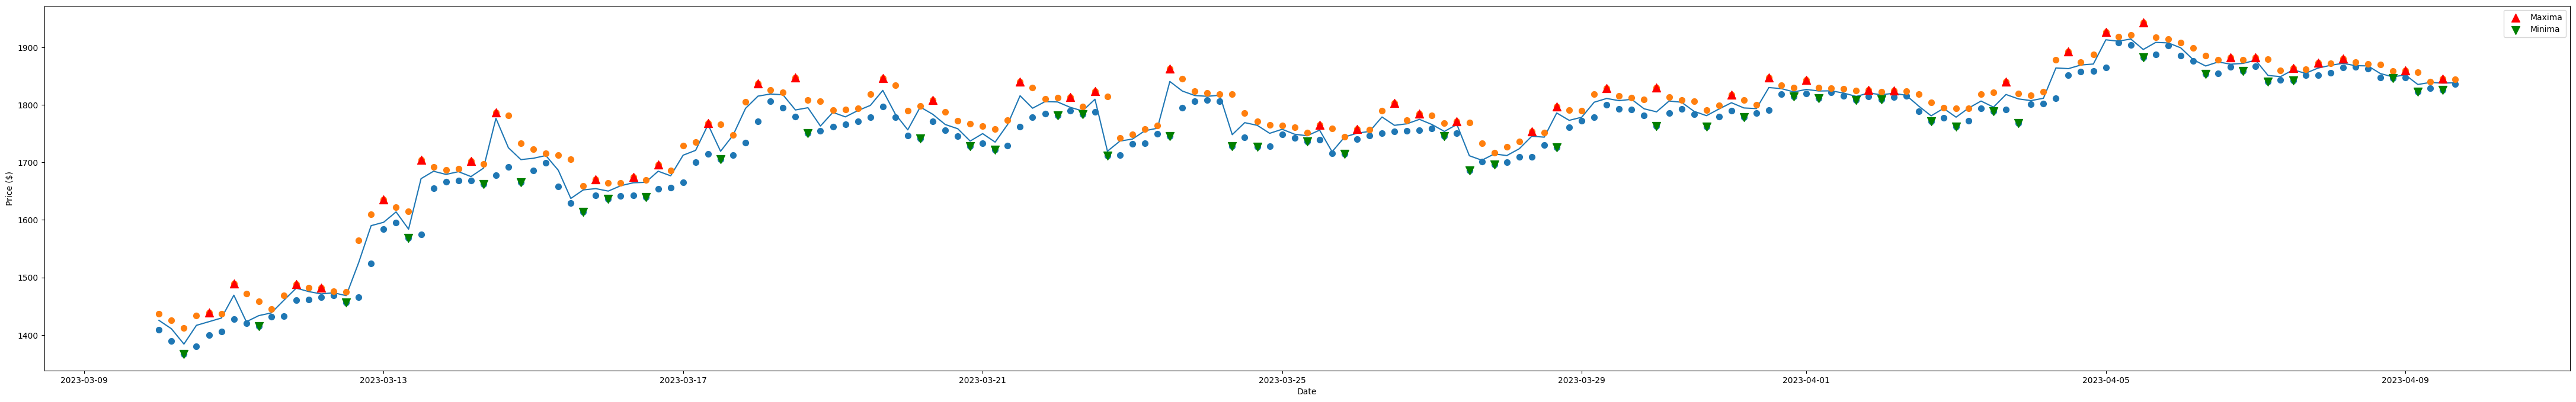

In [208]:

#local max close
data['local_max'] = data['high'][
  (data['high'].shift(1) < data['high']) &
  (data['high'].shift(-1) < data['high'])]

#local min close
data['local_min'] = data['low'][
  (data['low'].shift(1) > data['low']) &
  (data['low'].shift(-1) > data['low'])]

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

print(list(data['local_max']))
#plot
plt.figure(figsize=(55, 8))
plt.plot(data['close'], zorder=0)
plt.scatter(data.index, data['low'], s=50)
plt.scatter(data.index, data['high'],s=50)
plt.scatter(data.index, data['local_max'], s=100,
  label='Maxima', marker='^', c='r')
plt.scatter(data.index, data['local_min'], s=100,
  label='Minima', marker='v', c='g')
plt.xlabel('Date')
plt.ylabel('Price ($)')
#plt.title(f'Local Maxima and Minima for {ticker}')
plt.legend()
plt.show()

In [ ]:
#algo BB
Торговля верхней
Да/нет
Лонг/шорт/оба

Торговля средней

Торговля нижней

Период 1
Настройка

Период 2

Период 3

Лонг:
От Лоя бб
От хая бб

Шорт
От Лоя бб
От хая бб

In [212]:
#filters by day_week, to find any day
filter_day = 'D'
days_week = pd.date_range(data.index[0], data.index[-1], freq=filter_day).to_series().dt.dayofweek
days_week[days_week == 0 ].index

DatetimeIndex(['2023-03-13', '2023-03-20', '2023-03-27', '2023-04-03'], dtype='datetime64[ns]', freq=None)

In [210]:
# Define the parameters for the Bollinger Band calculation
ma_size = 5
bol_size = 2
# Calculate the SMA
data.insert(0, 'moving_average', data['close'].rolling(ma_size).mean())
# Calculate the upper and lower Bollinger Bands
data.insert(0, 'bol_upper', data['moving_average'] + data['close'].rolling(ma_size).std() * bol_size)
data.insert(0, 'bol_lower', data['moving_average'] - data['close'].rolling(ma_size).std() * bol_size)
# Remove the NaNs -> consequence of using a non-centered moving average
#data.dropna(inplace=True)
data.head()

,bol_lower,bol_upper,moving_average,symbol,interval,open_time,open,high,low,close,volume,turnover,local_max,local_min
2023-03-10 00:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.678406e+09,1436.60,1436.60,1408.60,1425.40,41986513.0,29518.245585,NaN,NaN
2023-03-10 04:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.678421e+09,1425.40,1425.60,1389.35,1410.75,64666761.0,45930.183768,NaN,NaN
2023-03-10 08:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.678435e+09,1410.75,1411.85,1367.15,1384.20,69742314.0,50357.105897,NaN,1367.15
2023-03-10 12:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.678450e+09,1384.20,1433.75,1379.80,1416.75,139275786.0,99195.649456,NaN,NaN
2023-03-10 16:00:00,1378.884518,1445.175482,1412.03,ETHUSD,240.0,1.678464e+09,1416.75,1438.50,1400.05,1423.05,55178392.0,38973.772304,1438.5,NaN


In [213]:

#графики
#plotly
fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['open'],
                high=data['high'],
                low=data['low'],
                close=data['close'])])

# Plot the three lines of the Bollinger Bands indicator
for parameter in ['moving_average', 'bol_lower', 'bol_upper']:
    fig.add_trace(go.Scatter(
        x = data.index,
        y = data[parameter],
        showlegend = False,
        line_color = 'gray',
        mode='lines',
        line={'dash': 'dash'},
        marker_line_width=2, 
        marker_size=10,
        opacity = 0.8))

# Plot the three lines of the Bollinger Bands indicator
fig.add_trace(go.Scatter(x = data.index,
                         y = data['local_max'],
                         showlegend = True,
                         line_color = 'orange',
                         mode='markers',
                         line={'dash': 'dash'},
                         marker_line_width=3, 
                         marker_size=10,
                         opacity = 0.8))

# Plot the three lines of the Bollinger Bands indicator
fig.add_trace(go.Scatter(x = data.index,
                         y = data['local_min'],
                         showlegend = True,
                         line_color = 'skyblue',
                         mode='markers',
                         line={'dash': 'dash'},
                         marker_line_width=3, 
                         marker_size=10,
                         opacity = 0.8))

# Plot the monday vlines


#разделение по дням
for indexes, day in days_week.items():
    if day == 1:
        fig.add_vline(x=indexes, 
        line_width=1, 
        line_dash="dash", 
        line_color="green")


fig.update_layout(
    autosize=False,
    width= 1100,
    height=800,)

fig.show()

In [178]:
data

,bol_lower,bol_upper,moving_average,symbol,interval,open_time,open,high,low,close,volume,turnover,local_max,local_min


In [ ]:
#тестирвоание управление капиталом
import random
randomlist = []
for i in range(0,1000):
  n = random.randint(1,97)
  randomlist.append(n)
print(len(randomlist), randomlist)

#income curve
curve = []
q=0
for i in range(len(randomlist)):
  #print(i)
  if randomlist[i]%4 == 0:
    q+=4
    curve.append(q)
  else:   
    q-= 1
    curve.append(q)
print(len(curve), curve)

#plot
plt.figure(figsize=(15, 8))
plt.plot(curve)
plt.xlabel('deal')
plt.ylabel('Price ($)')
#plt.title(f'Local Maxima and Minima for {ticker}')
plt.legend()
plt.show()